# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from lightgbm import LGBMClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

from statsmodels.stats.weightstats import ztest

import skopt

import pickle

import warnings
warnings.filterwarnings('ignore')

# Lendo os dados

In [2]:
df = pd.read_csv('../data/data.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# EDA

### Macro

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,2012-08-31,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### Valores Nulos

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Distribuição Features Numéricas

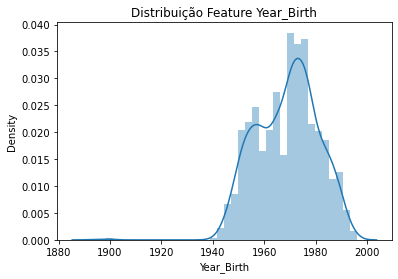

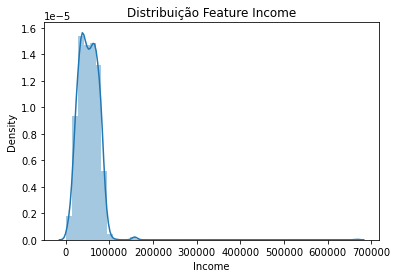

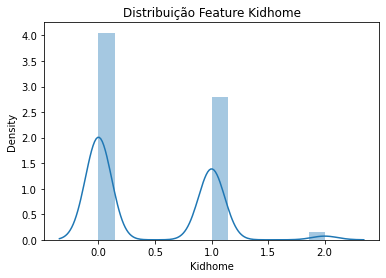

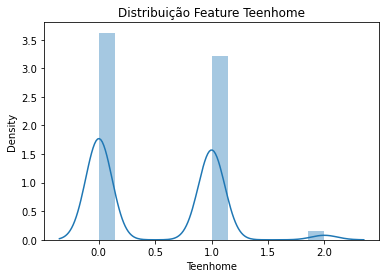

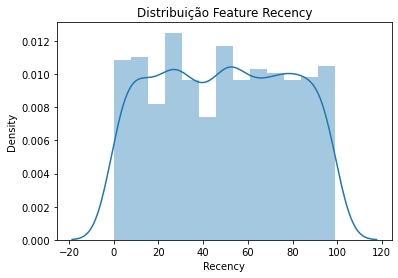

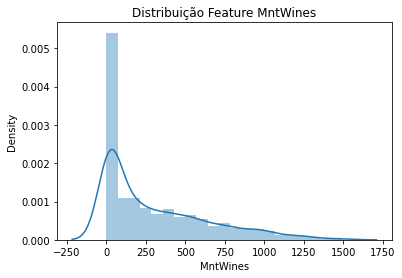

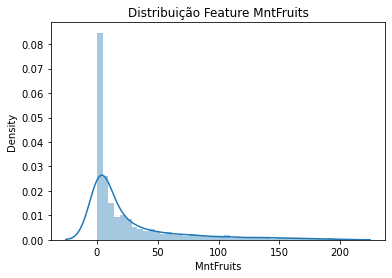

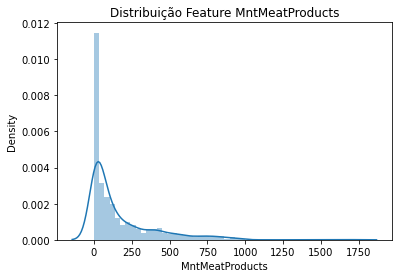

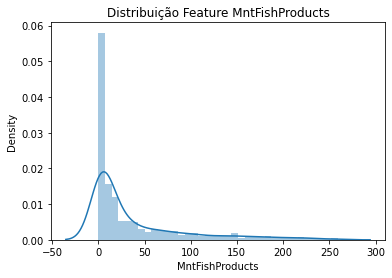

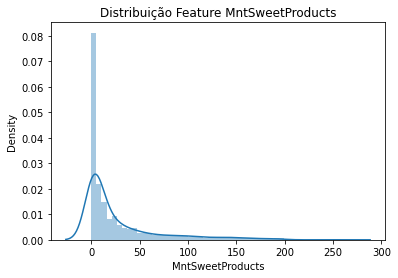

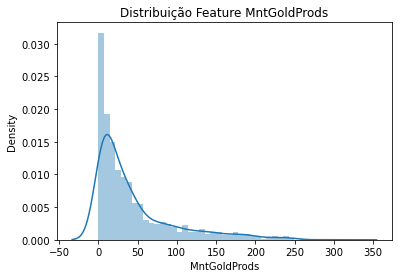

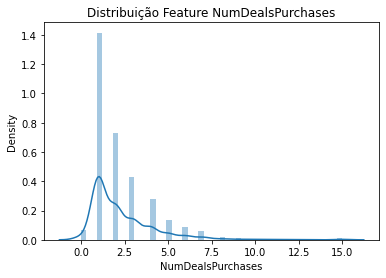

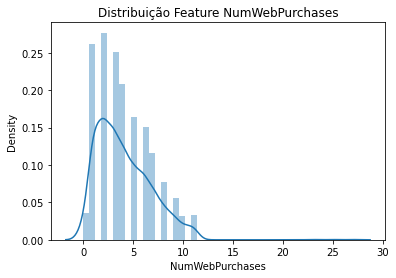

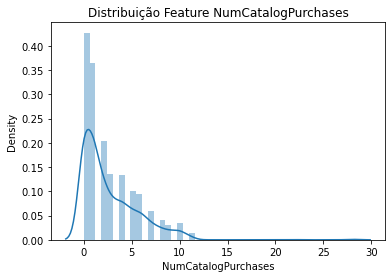

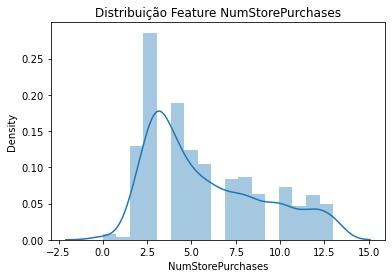

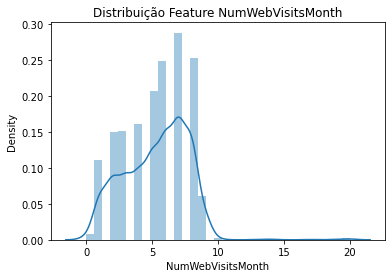

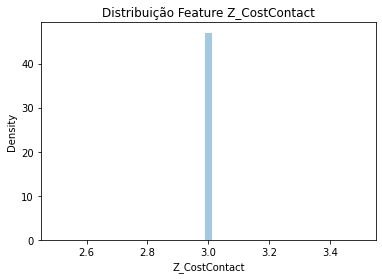

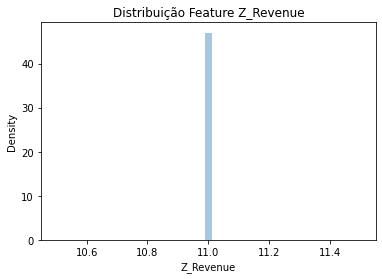

In [8]:
for column in df.drop(['ID', 'Response', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain'], axis=1).select_dtypes(include='number').columns:
    plt.title(f'Distribuição Feature {column}')
    sns.distplot(df[column])
    plt.show()

### Análise de Outliers

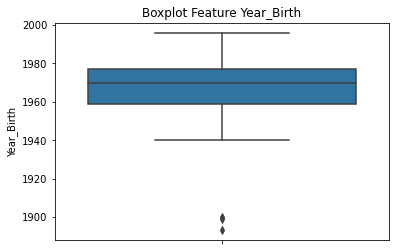

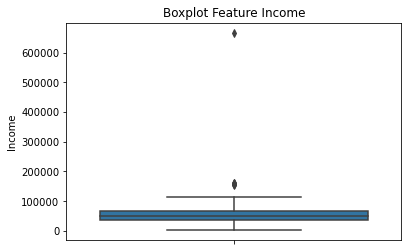

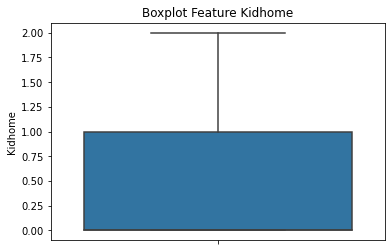

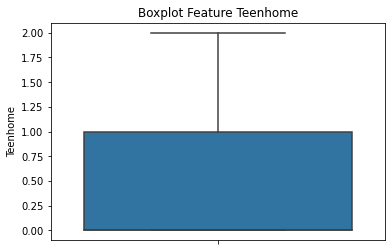

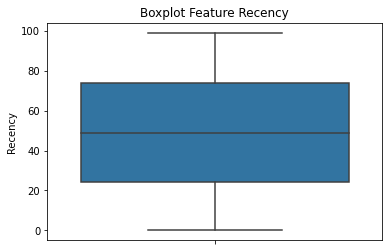

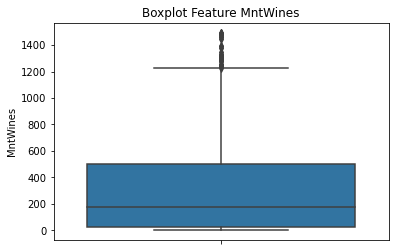

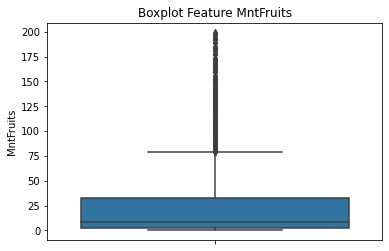

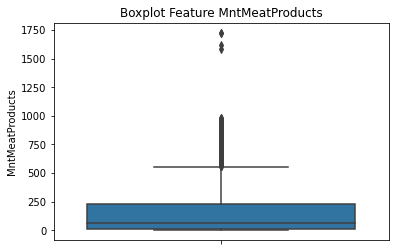

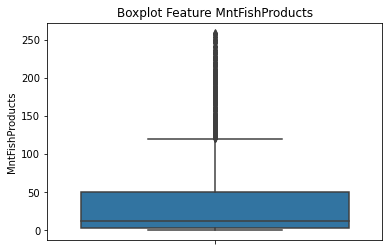

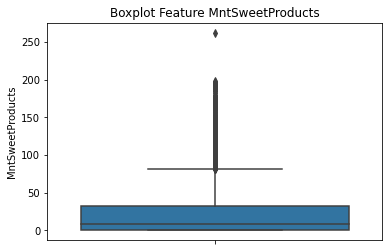

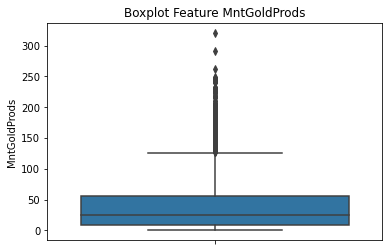

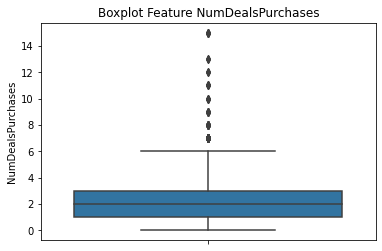

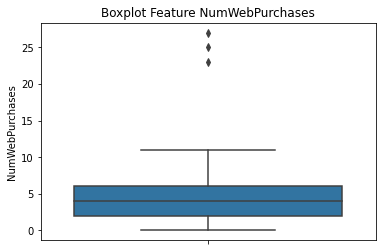

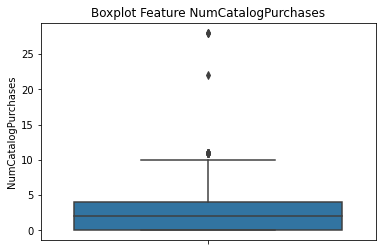

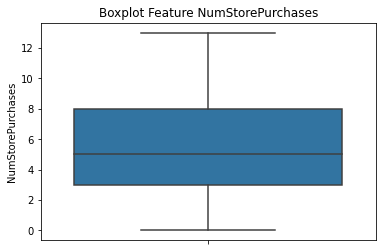

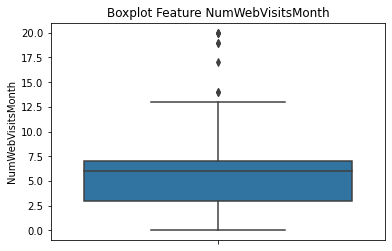

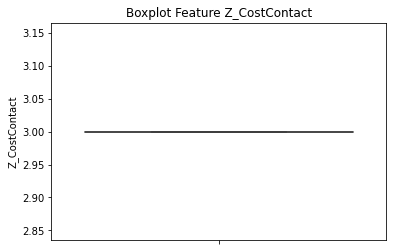

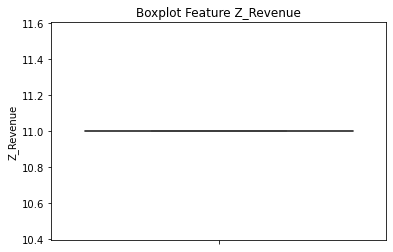

In [9]:
for column in df.drop(['ID', 'Response', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain'], axis=1).select_dtypes(include='number').columns:
    plt.title(f'Boxplot Feature {column}')
    sns.boxplot(data=df, y=column, orient='v')
    plt.show()

### Features Categóricas

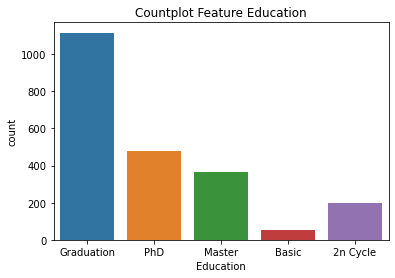

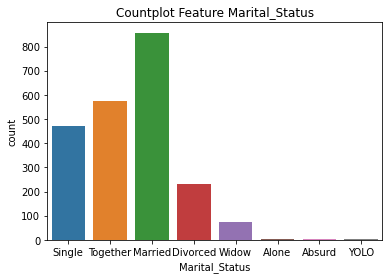

In [10]:
for column in df.drop('Dt_Customer', axis=1).select_dtypes(exclude='number').columns:
    plt.title(f'Countplot Feature {column}')
    sns.countplot(df[column])
    plt.show()

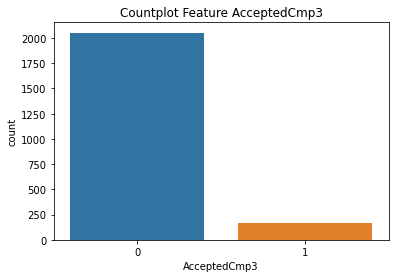

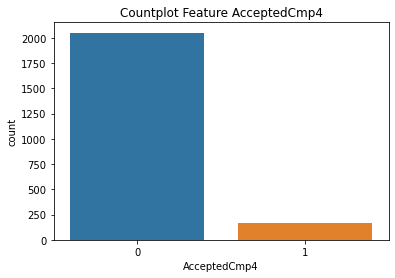

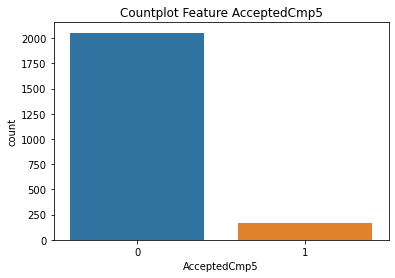

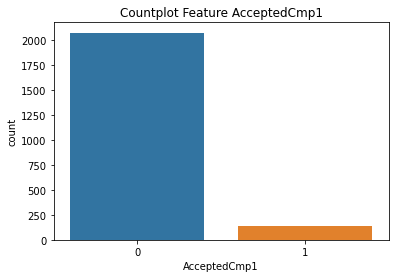

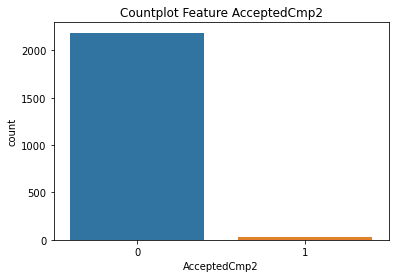

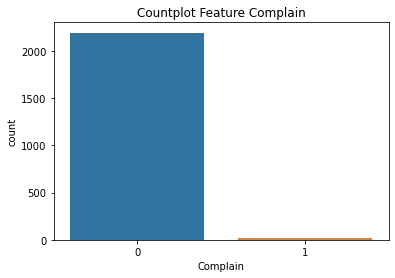

In [11]:
for column in ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']:
    plt.title(f'Countplot Feature {column}')
    sns.countplot(df[column])
    plt.show()

### Balanceamento dos Dados

<AxesSubplot:xlabel='Response', ylabel='count'>

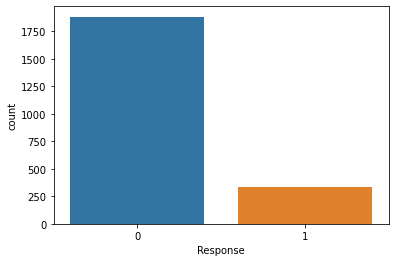

In [12]:
sns.countplot(df['Response'])

### Quais diferenças têm os que responderam à campanha?

##### Features Numéricas

In [13]:
def teste_hipotese(array1, array2, alpha=0.05):
    tstat, pvalue = ztest(array1, array2, value=0)
    if pvalue < 0.05:
        return 'Rejeita-se H0, há uma diferença entre as médias'
    else:
        return 'Aceita-se H0, NÃO há uma diferença entre as médias'

Feature Income -- Rejeita-se H0, há uma diferença entre as médias


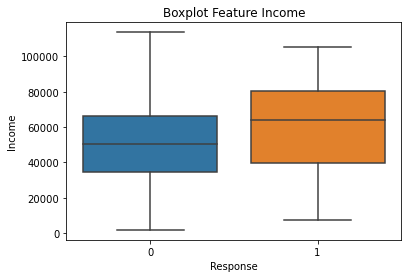

Feature Kidhome -- Rejeita-se H0, há uma diferença entre as médias


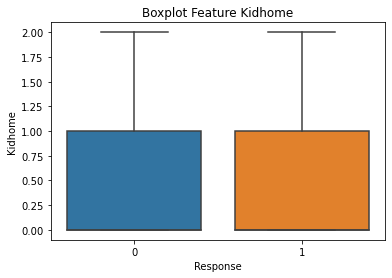

Feature Teenhome -- Rejeita-se H0, há uma diferença entre as médias


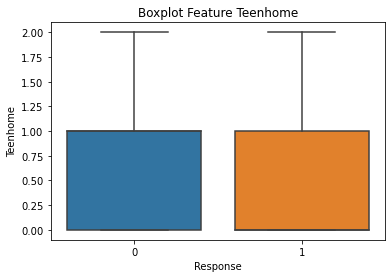

Feature Recency -- Rejeita-se H0, há uma diferença entre as médias


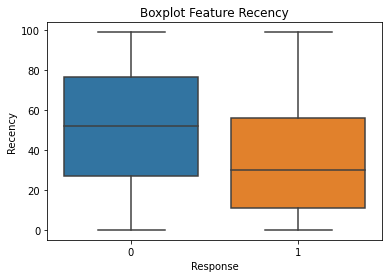

Feature MntWines -- Rejeita-se H0, há uma diferença entre as médias


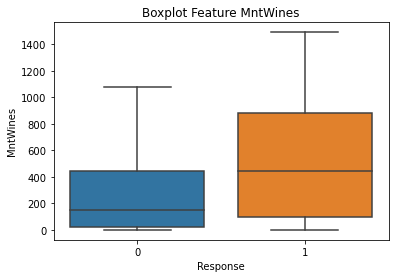

Feature MntFruits -- Rejeita-se H0, há uma diferença entre as médias


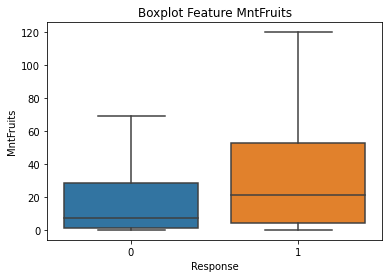

Feature MntMeatProducts -- Rejeita-se H0, há uma diferença entre as médias


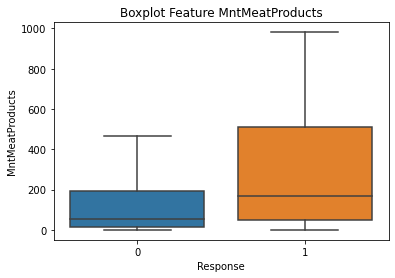

Feature MntFishProducts -- Rejeita-se H0, há uma diferença entre as médias


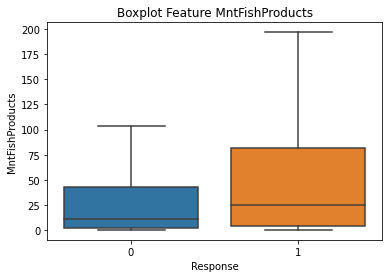

Feature MntSweetProducts -- Rejeita-se H0, há uma diferença entre as médias


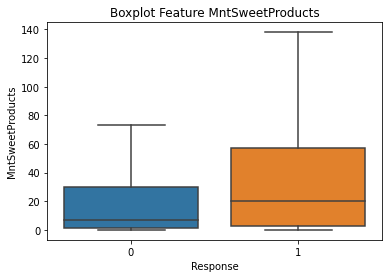

Feature MntGoldProds -- Rejeita-se H0, há uma diferença entre as médias


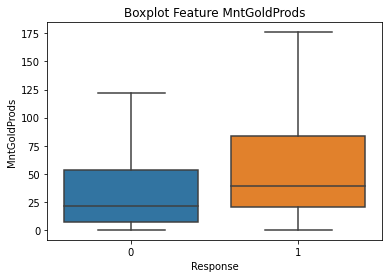

Feature NumWebPurchases -- Rejeita-se H0, há uma diferença entre as médias


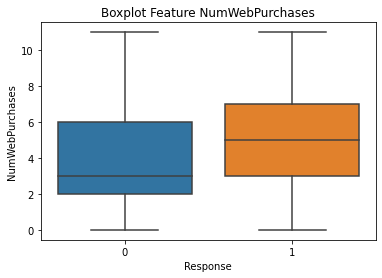

Feature NumCatalogPurchases -- Rejeita-se H0, há uma diferença entre as médias


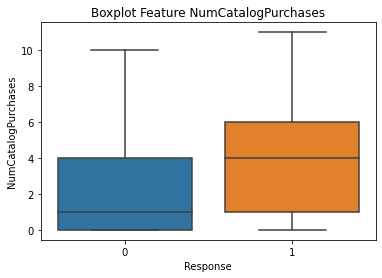

In [14]:
for column in df.drop(['ID', 'Response', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain'], axis=1).select_dtypes(include='number').columns:
    df_0 = df.loc[df['Response'] == 0]
    df_1 = df.loc[df['Response'] == 1]
    array0 = df_0[column].tolist()
    array1 = df_1[column].tolist()
    hipotese = teste_hipotese(array0, array1)
    
    if hipotese == 'Rejeita-se H0, há uma diferença entre as médias':
        print(f'Feature {column} -- {hipotese}')
        plt.title(f'Boxplot Feature {column}')
        sns.boxplot(data = df, y = column, x = 'Response', showfliers=False)
        plt.show()

##### Features Categóricas

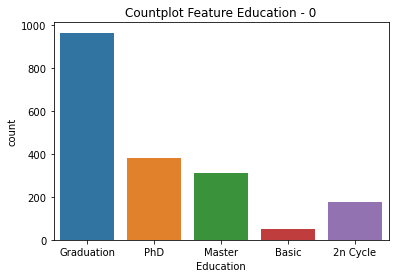

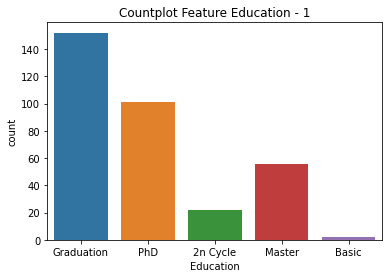

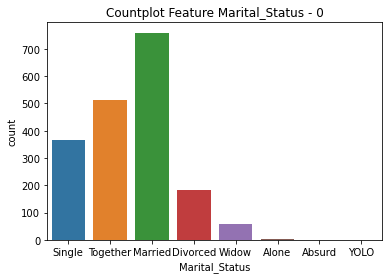

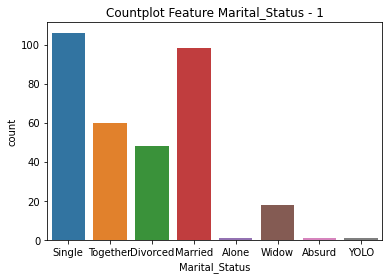

In [15]:
for column in df.drop('Dt_Customer', axis=1).select_dtypes(exclude='number').columns:
    df_0 = df.loc[df['Response']== 0]
    df_1 = df.loc[df['Response']== 1]
    plt.title(f'Countplot Feature {column} - 0')
    sns.countplot(df_0[column])
    plt.show()
    plt.title(f'Countplot Feature {column} - 1')
    sns.countplot(df_1[column])
    plt.show()

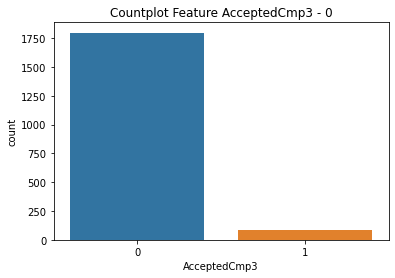

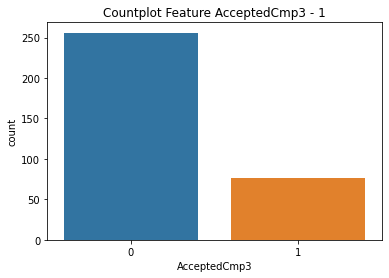

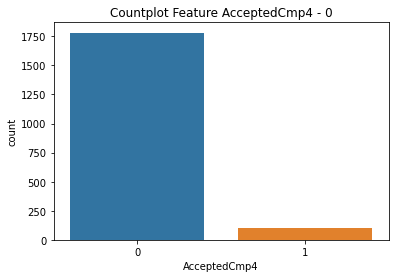

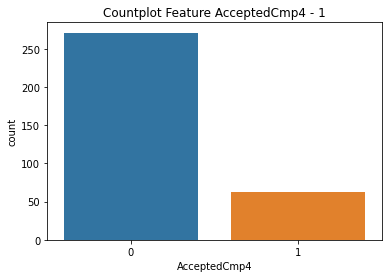

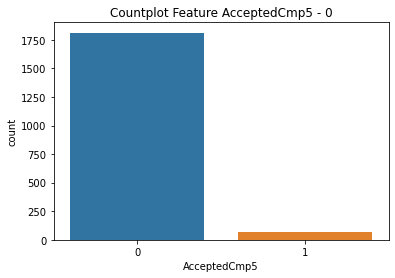

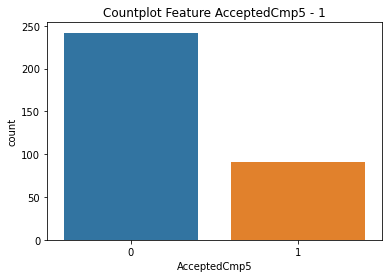

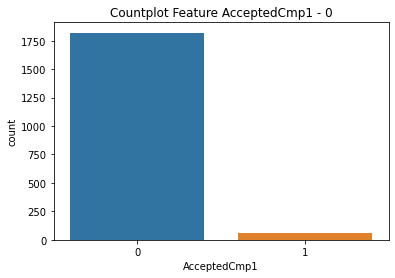

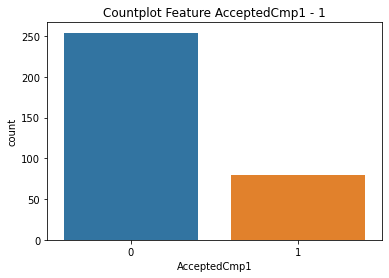

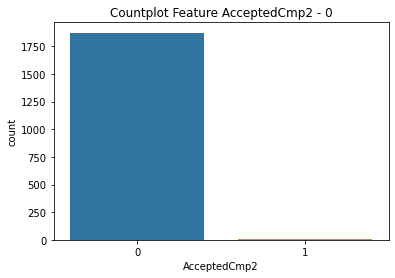

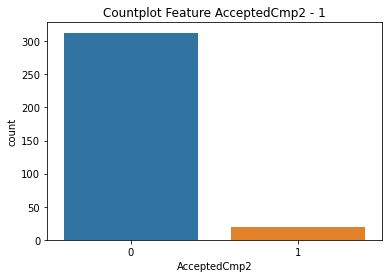

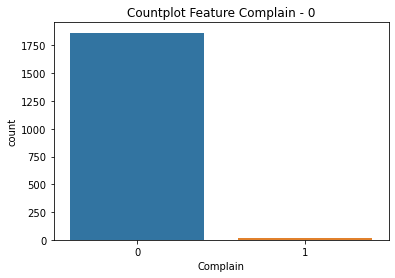

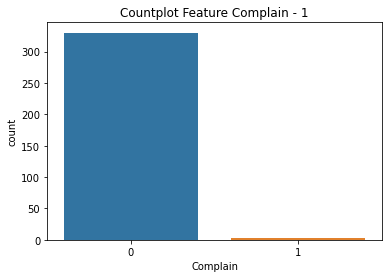

In [16]:
for column in ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']:
    df_0 = df.loc[df['Response'] == 0]
    df_1 = df.loc[df['Response'] == 1]
    plt.title(f'Countplot Feature {column} - 0')
    sns.countplot(df_0[column])
    plt.show()
    plt.title(f'Countplot Feature {column} - 1')
    sns.countplot(df_1[column])
    plt.show()

### Respostas campanhas anteriores

In [17]:
aceitou_1 = df.loc[df['AcceptedCmp1'] == 1]

perc_respostas_1 = round((len(aceitou_1)/len(df))*100,2)

print(f'{perc_respostas_1}% responderam à campanha 1')

6.41% responderam à campanha 1


In [18]:
aceitou_2 = df.loc[df['AcceptedCmp2'] == 1]

perc_respostas_2 = round((len(aceitou_2)/len(df))*100,2)
perc_1_respostas_2 = round(len(aceitou_2.loc[aceitou_2['AcceptedCmp1'] == 1])/len(aceitou_2)*100,2)

print(f'{perc_respostas_2}% responderam à campanha 2. Destes, {perc_1_respostas_2}% haviam aceitado à campanha 1')

1.35% responderam à campanha 2. Destes, 43.33% haviam aceitado à campanha 1


In [19]:
aceitou_3 = df.loc[df['AcceptedCmp3'] == 1]

perc_respostas_3 = round((len(aceitou_3)/len(df))*100,2)
perc_1_respostas_3 = round(len(aceitou_3.loc[aceitou_3['AcceptedCmp1'] == 1])/len(aceitou_3)*100,2)
perc_2_respostas_3 = round(len(aceitou_3.loc[aceitou_3['AcceptedCmp2'] == 1])/len(aceitou_3)*100,2)
perc_12_respostas_3 = round(len(aceitou_3.loc[(aceitou_3['AcceptedCmp1'] == 1) & (aceitou_3['AcceptedCmp2'] == 1)])/len(aceitou_3)*100,2)

print(f'{perc_respostas_3}% responderam à campanha 3. Destes, {perc_1_respostas_3}% haviam aceitado à campanha 1, {perc_2_respostas_3}% haviam aceitado à campanha 2 e {perc_12_respostas_3}% haviam aceitado as duas.')

7.36% responderam à campanha 3. Destes, 14.72% haviam aceitado à campanha 1, 4.29% haviam aceitado à campanha 2 e 1.84% haviam aceitado as duas.


In [20]:
aceitou_4 = df.loc[df['AcceptedCmp4'] == 1]

perc_respostas_4 = round((len(aceitou_4)/len(df))*100,2)
perc_1_respostas_4 = round(len(aceitou_4.loc[aceitou_4['AcceptedCmp1'] == 1])/len(aceitou_4)*100,2)
perc_3_respostas_4 = round(len(aceitou_4.loc[aceitou_4['AcceptedCmp3'] == 1])/len(aceitou_4)*100,2)
perc_123_respostas_4 = round(len(aceitou_4.loc[(aceitou_4['AcceptedCmp1'] == 1) & (aceitou_4['AcceptedCmp2'] == 1) & (aceitou_4['AcceptedCmp3'] == 1)])/len(aceitou_4)*100,2)

print(f'{perc_respostas_4}% responderam à campanha 4. Destes, {perc_1_respostas_4}% haviam aceitado à campanha 1, {perc_3_respostas_4}% haviam aceitado à campanha 3 e {perc_123_respostas_4}% haviam aceitado todas as anteriores.')

7.4% responderam à campanha 4. Destes, 27.44% haviam aceitado à campanha 1, 0.0% haviam aceitado à campanha 3 e 0.0% haviam aceitado todas as anteriores.


In [21]:
aceitou_5 = df.loc[df['AcceptedCmp5'] == 1]

perc_respostas_5 = round((len(aceitou_5)/len(df))*100,2)
perc_1_respostas_5 = round(len(aceitou_5.loc[aceitou_5['AcceptedCmp1'] == 1])/len(aceitou_5)*100,2)
perc_4_respostas_5 = round(len(aceitou_5.loc[aceitou_5['AcceptedCmp4'] == 1])/len(aceitou_5)*100,2)
perc_1234_respostas_5 = round(len(aceitou_5.loc[(aceitou_5['AcceptedCmp1'] == 1) & (aceitou_5['AcceptedCmp2'] == 1) & (aceitou_5['AcceptedCmp3'] == 1) & (aceitou_5['AcceptedCmp4'] == 1)])/len(aceitou_5)*100,2)

print(f'{perc_respostas_5}% responderam à campanha 5. Destes, {perc_1_respostas_4}% haviam aceitado à campanha 1, {perc_4_respostas_5}% haviam aceitado à campanha 4 e {perc_1234_respostas_5}% haviam aceitado todas as anteriores.')

7.31% responderam à campanha 5. Destes, 27.44% haviam aceitado à campanha 1, 36.42% haviam aceitado à campanha 4 e 0.0% haviam aceitado todas as anteriores.


# Feature Engineering

### Criando Features

In [22]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [23]:
df['age'] = 2022 - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,65
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,68
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,57
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,38
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,41


<AxesSubplot:xlabel='age', ylabel='Density'>

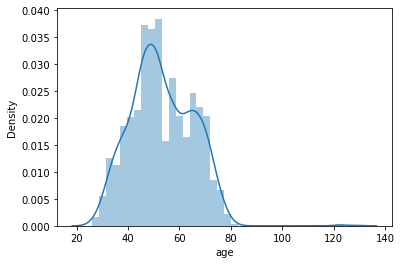

In [24]:
sns.distplot(df['age'])

In [25]:
df.drop(df.loc[df['age']>=100].index.to_list(), axis=0, inplace=True)

In [26]:
df['today'] = pd.to_datetime(datetime.datetime.today().strftime("%Y-%m-%d"))
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,today
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,3,11,1,65,2022-07-27
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,3,11,0,68,2022-07-27
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,3,11,0,57,2022-07-27
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,3,11,0,38,2022-07-27
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,3,11,0,41,2022-07-27


In [27]:
df['Enrollment_time'] = (df['today'] - df['Dt_Customer'])/np.timedelta64(1, 'Y')
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,today,Enrollment_time
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,3,11,1,65,2022-07-27,9.892058
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,3,11,0,68,2022-07-27,8.386209
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,3,11,0,57,2022-07-27,8.931053
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,3,11,0,38,2022-07-27,8.457395
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,3,11,0,41,2022-07-27,8.517629


In [28]:
df.drop(['ID', 'Dt_Customer', 'today'], axis=1, inplace=True)

### OneHot Encoder

In [29]:
df_dummy = pd.get_dummies(df)
df_dummy

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,0,1,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,1,0,0,0,0,0,1,0,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,0,0,1,0,0


# Modelo Classificação

A métrica mais importante é a Acurácia. Queremos todos que tenham a maior chance de responder a oferta, mas também não queremos sair enviando oferta pra todo mundo pois o dinheiro é limitado. Ou seja, estamos buscando os True Positives e True Negatives, a métrica que melhor reflete isso, é a acurácia.

In [30]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

In [31]:
X = df_dummy.drop('Response', axis=1)
y = df_dummy['Response']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

### Dummy Estimator

In [33]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
pred = dummy.predict(X_test)

In [34]:
accuracy = round(metrics.accuracy_score(y_test, pred)*100,2)
precision = round(metrics.precision_score(y_test, pred)*100,2)
recall = round(metrics.recall_score(y_test, pred)*100,2)
auc = round(metrics.roc_auc_score(y_test, pred)*100,2)

print(f'''
      Dummy Classifier
      Accuracy: {accuracy}
      Precision: {precision}
      Recall: {recall}
      AUC: {auc}
      ''')


      Dummy Classifier
      Accuracy: 85.78
      Precision: 0.0
      Recall: 0.0
      AUC: 50.0
      


### Sampling Strategy

In [35]:
resamples = [RandomOverSampler(), SMOTE(), ADASYN(), RandomUnderSampler(), TomekLinks()]

for resampler in resamples:
    res = resampler
    X_res, y_res = res.fit_resample(X_train, y_train)

    lr = LogisticRegression()
    
    cv = cross_val_score(lr, X_res, y_res, cv=skf, scoring='accuracy')

    accuracy = round(cv.mean()*100,2)
    accuracy_std = round(cv.std()*100,2)

    print(f'''
        {res}
        Accuracy: ({accuracy} +/- {accuracy_std})%
        ''')


        RandomOverSampler()
        Accuracy: (68.5 +/- 2.38)%
        

        SMOTE()
        Accuracy: (68.67 +/- 2.61)%
        

        ADASYN()
        Accuracy: (67.56 +/- 2.31)%
        

        RandomUnderSampler()
        Accuracy: (68.52 +/- 4.76)%
        

        TomekLinks()
        Accuracy: (84.57 +/- 1.88)%
        


In [36]:
res = ADASYN()
X_res, y_res = res.fit_resample(X_train, y_train)

### Métodos

In [37]:
metodos = [LogisticRegression(), KNeighborsClassifier(), GaussianNB(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), LGBMClassifier()]

In [38]:
for metodo in metodos:
    cv = cross_val_score(metodo, X_res, y_res, cv=skf, scoring='accuracy')
    accuracy = round(cv.mean()*100,2)
    accuracy_std = round(cv.std()*100,2)
    print(f'''
          {metodo}
          Accuracy: ({accuracy} +/- {accuracy_std})%
          ''')


          LogisticRegression()
          Accuracy: (67.56 +/- 2.65)%
          

          KNeighborsClassifier()
          Accuracy: (74.77 +/- 1.89)%
          

          GaussianNB()
          Accuracy: (64.78 +/- 3.2)%
          

          SVC()
          Accuracy: (58.92 +/- 1.9)%
          

          DecisionTreeClassifier()
          Accuracy: (86.93 +/- 2.13)%
          

          RandomForestClassifier()
          Accuracy: (93.7 +/- 1.62)%
          

          LGBMClassifier()
          Accuracy: (93.03 +/- 1.39)%
          


# LGBM

In [39]:
lgbm = LGBMClassifier()
cv = cross_val_score(lgbm, X_res, y_res, cv=skf, scoring = 'accuracy')
accuracy = round(cv.mean()*100,2)
accuracy_std = round(cv.std()*100,2)
print(f'''
      LGBM
      Accuracy: ({accuracy} +/- {accuracy_std})%
      ''')


      LGBM
      Accuracy: (93.03 +/- 1.39)%
      


In [40]:
rs_params = {
'learning_rate': skopt.space.Real(0.01, 0.5, prior='log-uniform'),
'max_depth': skopt.space.Integer(1, 30),
'num_leaves': skopt.space.Integer(10, 200),
'subsample': skopt.space.Real(0.1, 1.0)
}

In [41]:
rs = RandomizedSearchCV(estimator=LGBMClassifier(), param_distributions=rs_params, cv=skf, scoring='accuracy', verbose=1)
rs.fit(X_res, y_res)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                   estimator=LGBMClassifier(),
                   param_distributions={'learning_rate': Real(low=0.01, high=0.5, prior='log-uniform', transform='identity'),
                                        'max_depth': Integer(low=1, high=30, prior='uniform', transform='identity'),
                                        'num_leaves': Integer(low=10, high=200, prior='uniform', transform='identity'),
                                        'subsample': Real(low=0.1, high=1.0, prior='uniform', transform='identity')},
                   scoring='accuracy', verbose=1)

In [42]:
lgbm_tuned = rs.best_estimator_
lgbm_tuned

LGBMClassifier(learning_rate=[0.22511382351835163],
               max_depth=array([13], dtype=int64),
               num_leaves=array([73], dtype=int64),
               subsample=[0.2987876943673844])

In [43]:
cv = cross_val_score(lgbm_tuned, X_res, y_res, cv=skf, scoring='accuracy')
accuracy = round(cv.mean()*100,2)
accuracy_std = round(cv.std()*100,2)
print(f'''
      LGBM Tuned
      accuracy: ({accuracy} +/- {accuracy_std})%
      ''')


      LGBM Tuned
      accuracy: (94.07 +/- 1.12)%
      


### Teste

In [44]:
y_test_pred = lgbm_tuned.predict(X_test)

In [45]:
accuracy_test = round(metrics.accuracy_score(y_test, y_test_pred)*100,2)

precision_test = round(metrics.precision_score(y_test, y_test_pred)*100,2)

recall_test = round(metrics.recall_score(y_test, y_test_pred)*100,2)

f1_score_test = round(metrics.f1_score(y_test, y_test_pred)*100,2)

print(f'''
      As métricas do teste com HiperParams foram:
      Acurária = {accuracy_test}%
      Precisão = {precision_test}%
      Recall = {recall_test}%
      F1 Score = {f1_score_test}%
      ''')


      As métricas do teste com HiperParams foram:
      Acurária = 89.39%
      Precisão = 62.9%
      Recall = 61.9%
      F1 Score = 62.4%
      


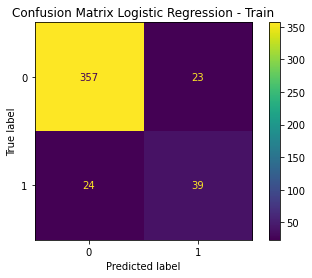

In [46]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix Logistic Regression - Train')
plt.show()

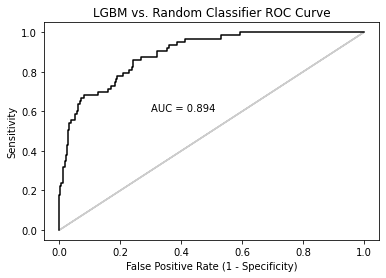

In [47]:
modelo_probabilidades = lgbm_tuned.predict_proba(X_test)[:, 1]
false_positive_rate_values, sensitivity_values, thresholds = metrics.roc_curve(y_test, modelo_probabilidades, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, modelo_probabilidades),3)

plt.step(false_positive_rate_values, sensitivity_values, color='black', where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')

plt.step(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), color='black', alpha=0.2,
         where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('LGBM vs. Random Classifier ROC Curve')
plt.annotate(f'AUC = {auc}', xy=(0.3, 0.6))

plt.show()

# Exportando o modelo treinado

In [48]:
pickle.dump(lgbm_tuned, open('../models/lightgbm_ifood.pkl', 'wb'))